In [270]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_December_2019.csv")

In [47]:
# df.head()

In [9]:
# df1 = pd.read_csv("./raw_tracks.csv")

In [45]:
# df1.head()

In [46]:
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data/")]
all_monthly_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    all_monthly_data =pd.concat([all_monthly_data, df])
    
df.head()    
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [32]:

# pd.set_option('max_row', None)
# print(df1)



In [43]:
# print(df)

In [34]:
all_monthly_data.to_csv("all_data.csv",index=False)

In [40]:
# dataframe converted to csv and reading all data

In [50]:
# all_data = pd.read_csv("all_data.csv")
# all_data.head()

In [49]:
# all_data.head()


In [16]:
all_data1 = all_data.loc[:, :'Unnamed: 0']

In [19]:
all_data1 = all_data.loc[:, :'Purchase Address']

In [114]:
# all_data1.head()

## __Clean the data first before doing any calculations__

# Drop rows of Nan

# 1.What was the best month for sales? How much was earned that month?


In [87]:
# adding months column
all_data1["months"] = all_data1["Order Date"].str[0:2]

In [166]:
# taking the nan rows and putting the index of rows in a list to delete it.
nan_rows =  all_data1[all_data1.isna().any(axis=1)]
listofNanRowsIndex = [item for item in nan_rows.index ]
# taking the OR rows and putting the index of rows in a list to delete it.

OrRows = all_data1.loc[all_data1['months'] == "Or"]
listOfOrRows = [ item for item in OrRows.index]
all_data1.drop(listOfOrRows, axis=0, inplace=True)



In [192]:
# all_data1.to_csv("all_data3.csv",index=False)
all_data1.rename(columns = {'months':'month'}, inplace = True)


In [177]:
all_data1["months"] =  all_data1["months"].astype("int32")
all_data1['Quantity Ordered'] = pd.to_numeric(all_data1['Quantity Ordered'])
all_data1["Price Each"] = pd.to_numeric(all_data1["Price Each"])
# make an amount column that multiplies quantity and price for all
# add the amount column where months is same. Just using groupby is easier
# compare them and see.


In [188]:
all_data1["Amount"] = all_data1['Quantity Ordered'] * all_data1["Price Each"]

In [199]:
results = all_data1.groupby('month').sum()
print(results)

       Quantity Ordered  Price Each      Amount
month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


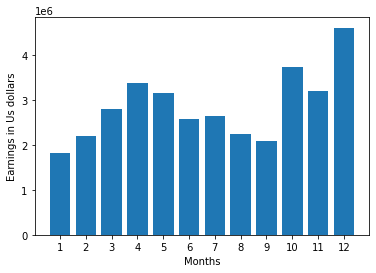

In [209]:
month = range(1,13)
plt.bar(month, results["Amount"])
plt.xticks(month)
plt.ylabel("Earnings in Us dollars")
plt.xlabel("Months")
plt.show()


# 2. which city has the highest sales

In [279]:
city = []
for i in all_data1["Purchase Address"]:
    element = i.split(',')
    city.append(element[1] + " " + "(" + element[2].split( )[0] + ")")
all_data1['City'] = city

In [243]:
all_data1.rename(columns = {'City1':'City'}, inplace = True)
# all_data1.drop(columns = "city", inplace = True)


In [ ]:
# all_data1.loc[all_data1['Amount'].idxmax()]
results = all_data1.groupby('City').sum()
print(results["Amount"])

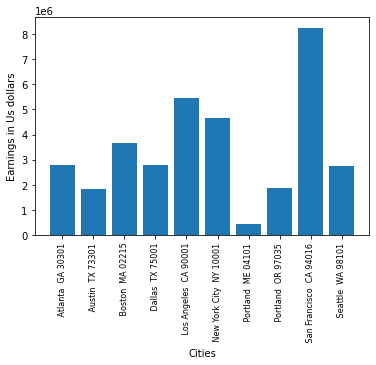

In [271]:
cities = all_data1["City"].unique()
main_cities = np.sort(cities)
plt.bar(main_cities, results["Amount"])
plt.xticks(main_cities , rotation = "vertical", size =8)
plt.ylabel("Earnings in Us dollars")
plt.xlabel("Cities")
plt.show()

In [284]:
all_data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Amount,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA)


### 3. At what time should we do advertisement to increase the likelihood of customer buying the product?


In [281]:
all_data1["Order Date"] = pd.to_datetime(all_data1["Order Date"])

In [326]:
all_data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Amount,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA),14,44
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX),10,19
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA),17,48
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA),7,52
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA),19,3


In [288]:
all_data1["Hour"] = all_data1["Order Date"].dt.hour
all_data1["Minute"] = all_data1["Order Date"].dt.minute

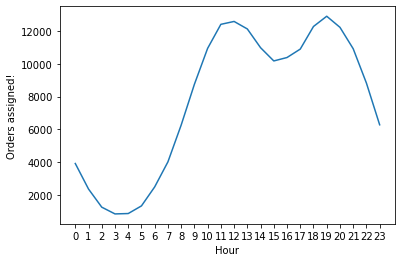

In [325]:
hours = all_data1["Hour"].unique()
hourMain =  np.sort(hours)
orderDone = all_data1.groupby("Hour").count()
plt.plot(hourMain,orderDone["Order Date"])
plt.xticks(hourMain)
plt.xlabel("Hour")
plt.ylabel("Orders assigned!")
plt.show()


# What products are most often sold  together?

In [348]:
#solution overview:
first, make a new dataframe from all_data1 , where the column "Order Id" is duplicated
then, do a groupby that shows different Products name as a list respective to the order ID.
then, convert it to csv and then open it using read_csv( seemed necessary because of Product header missing.)
now, make a nested lists of lists in ascending order to use in itertools.


In [353]:
df1  = all_data1[all_data1["Order ID"].duplicated(keep=False)]

In [376]:
df2 = df1.groupby('Order ID')['Product'].apply(list)
df2.head()
df2.to_csv("repeated_products.csv",index=True)

In [470]:
df3 = pd.read_csv("./repeated_products.csv")
df3.head()

,Order ID,Product
0,141275,"['USB-C Charging Cable', 'Wired Headphones']"
1,141290,"['Apple Airpods Headphones', 'AA Batteries (4-..."
2,141365,"['Vareebadd Phone', 'Wired Headphones']"
3,141384,"['Google Phone', 'USB-C Charging Cable']"
4,141450,"['Google Phone', 'Bose SoundSport Headphones']"


In [471]:
nestedList = []
for i in df3["Product"]:
    nestedList.append(i)


In [472]:
# data manipulation to get list of lists to use in itertools
ultimate_list =[]
for i in range(len(df3)):
    final = nestedList[i][2:-2].split(',')
    final_list =[]
    for i in range(len(final)):
        newfinal = final[i].replace("'", "")
        final_list.append(newfinal)
    ultimate_list.append(final_list)

   
print(ultimate_list[0][0])

USB-C Charging Cable


In [484]:
# code to find the most frequent combination of 2 elements in a list out of many lists.
from itertools import combinations
from collections import Counter

def most_freq(l, n):
    temp=[]
    for i in l:
        temp.extend(tuple(k) for k in combinations(i, n))
    res = Counter(temp)
    return res

for i in range(2,5):
    for key, value in most_freq(ultimate_list, 2).most_common(10):
        print(key, value)

('Google Phone', ' USB-C Charging Cable', ' Wired Headphones') 87
('iPhone', ' Lightning Charging Cable', ' Wired Headphones') 62
('iPhone', ' Lightning Charging Cable', ' Apple Airpods Headphones') 47
('Google Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 35
('Vareebadd Phone', ' USB-C Charging Cable', ' Wired Headphones') 33
('iPhone', ' Apple Airpods Headphones', ' Wired Headphones') 27
('Google Phone', ' Bose SoundSport Headphones', ' Wired Headphones') 24
('Vareebadd Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 16
('Vareebadd Phone', ' Bose SoundSport Headphones', ' Wired Headphones') 5
(' USB-C Charging Cable', ' Bose SoundSport Headphones', ' Wired Headphones') 5
('Google Phone', ' USB-C Charging Cable', ' Wired Headphones') 87
('iPhone', ' Lightning Charging Cable', ' Wired Headphones') 62
('iPhone', ' Lightning Charging Cable', ' Apple Airpods Headphones') 47
('Google Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 35
('Vare

In [468]:
#Keith Galli's solution:
df4  = all_data1[all_data1["Order ID"].duplicated(keep=False)]
df4["Grouped"] = df4.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))
df4 =df3[["Grouped", "Order ID"]].drop_duplicates()
df4.head()

/tmp/ipykernel_32650/546756339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Grouped"] = df4.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))


,Grouped,Order ID
20,"USB-C Charging Cable,USB-C Charging Cable",248171
60,"iPhone,Lightning Charging Cable",248210
70,"Bose SoundSport Headphones,Google Phone",248219
117,"Vareebadd Phone,Bose SoundSport Headphones",248265
176,"Google Phone,Bose SoundSport Headphones",248323


In [477]:
# dfe = df4["Grouped"]
# nestedList1 = []
# for i in df3["Product"]:
#     nestedList1.append(i)
# print(nestedList1[0][0])    
# if we try to see the  [0][0] ,we get one letter like before. so, instead of that, just,,


In [479]:
# code to find the most frequent combination of 2 elements in a list out of many lists.
from itertools import combinations
from collections import Counter

count = Counter()

for row in df4["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
print(count)    
# so the only difference is me trying to manipulate apostrophee, which was unnecessary. just split the string 
# to make it a list and that will work with itertools.

# What product sold the most and why ?


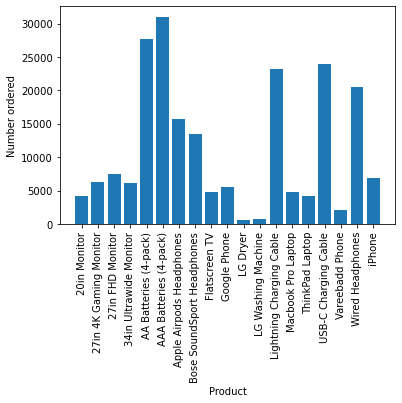

In [503]:
import seaborn as sns
product = all_data1["Product"].unique()
main_product =  np.sort(product)
groupedProduct = all_data1.groupby("Product").sum()["Quantity Ordered"]
plt.bar(main_product,groupedProduct)
plt.xticks(main_product, rotation ="vertical")
plt.xlabel("Product")
plt.ylabel("Number ordered")
plt.show()


# prices

In [500]:
prices = all_data1.groupby("Product").mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/tmp/ipykernel_32650/447423469.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(main_product, rotation='vertical', size=8)
/tmp/ipykernel_32650/447423469.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


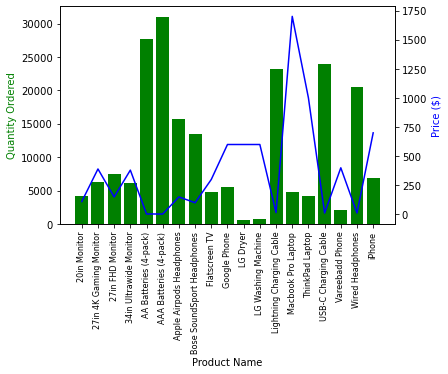

In [504]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(main_product, groupedProduct, color='g')
ax2.plot(main_product, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(main_product, rotation='vertical', size=8)

fig.show()